In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (7043, 21)


In [5]:

# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
# Convert TotalCharges to numeric (will turn blanks into NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
# Check again
print(df['TotalCharges'].isnull().sum())

11


In [9]:
# Drop rows with missing TotalCharges
df = df.dropna(subset=['TotalCharges'])

In [10]:
# Reset index after dropping
df.reset_index(drop=True, inplace=True)

In [11]:
df.drop('customerID', axis=1, inplace=True)

In [12]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [13]:
# Step 1: Label Encoding for binary columns
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Female': 1, 'Male': 0})

# Step 2: One-Hot Encoding for multi-category columns
df = pd.get_dummies(df, columns=[
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
])


In [14]:
print("New shape of dataset:", df.shape)
df.head()


New shape of dataset: (7032, 41)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,2,1,1,53.85,108.15,1,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,2,1,1,70.70,151.65,1,...,True,False,False,True,False,False,False,False,True,False


In [15]:
# Split features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

----- Logistic Regression -----
Accuracy: 0.7867803837953091
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



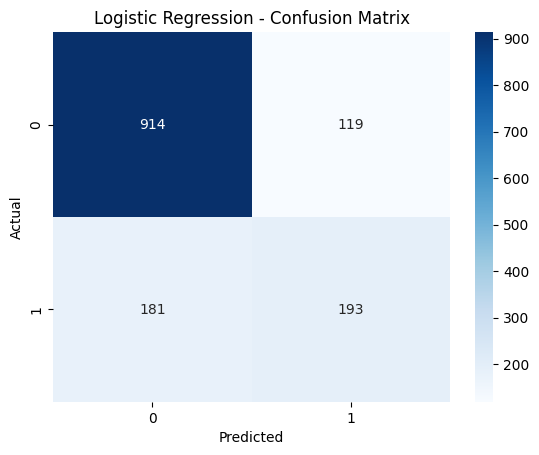

----- Random Forest -----
Accuracy: 0.7825159914712153
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



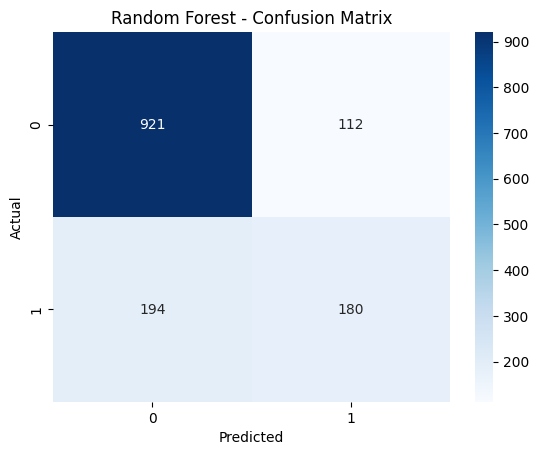

In [17]:
# Evaluation Function
def evaluate_model(name, y_test, y_pred):
    print(f"----- {name} -----")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate both models
evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Random Forest", y_test, y_pred_rf)

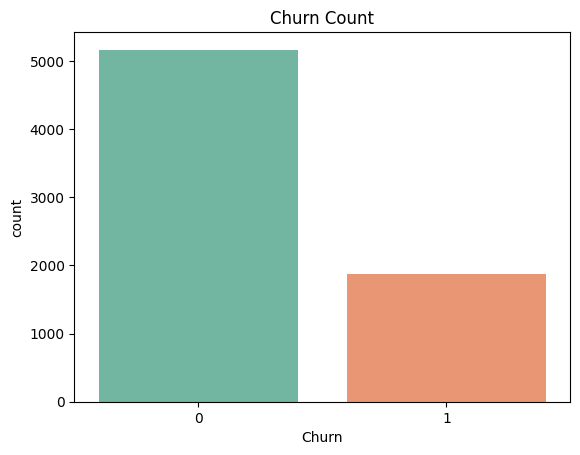

In [18]:
sns.countplot(data=df, x='Churn', hue='Churn', palette='Set2', legend=False)
plt.title('Churn Count')
plt.show()

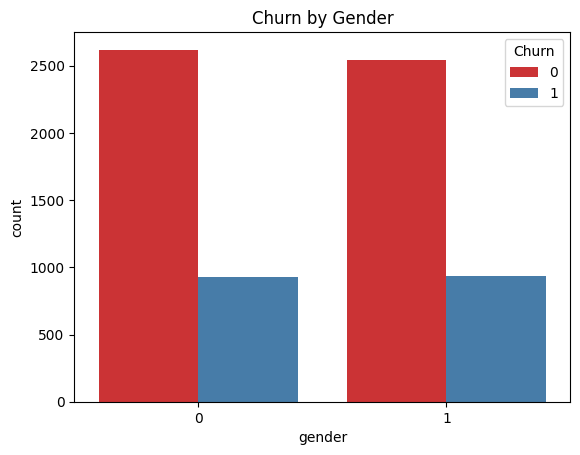

In [19]:
sns.countplot(data=df, x='gender', hue='Churn', palette='Set1')
plt.title('Churn by Gender')
plt.show()


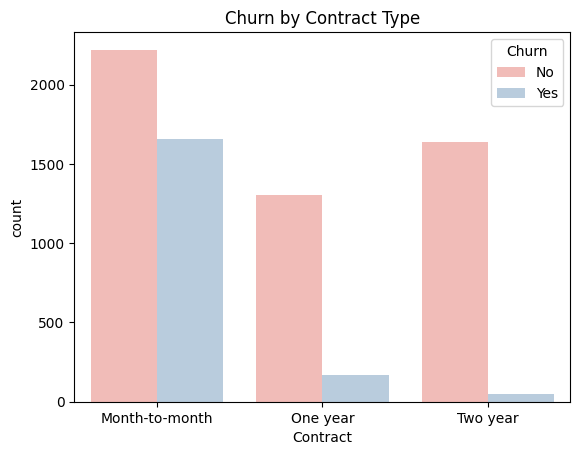

In [21]:
contract_cols = ['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']
df_contract = df.copy()
df_contract['Contract'] = df_contract[contract_cols].idxmax(axis=1).str.replace('Contract_', '')

sns.countplot(data=df_contract, x='Contract', hue='Churn', palette='Pastel1')
plt.title('Churn by Contract Type')
plt.show()


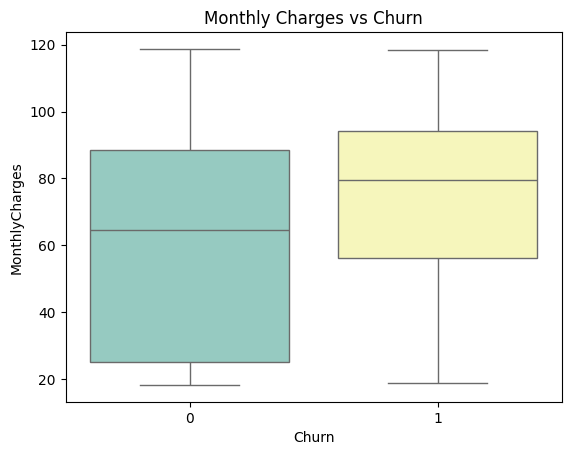

In [20]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', hue='Churn', palette='Set3', legend=False)
plt.title('Monthly Charges vs Churn')
plt.show()


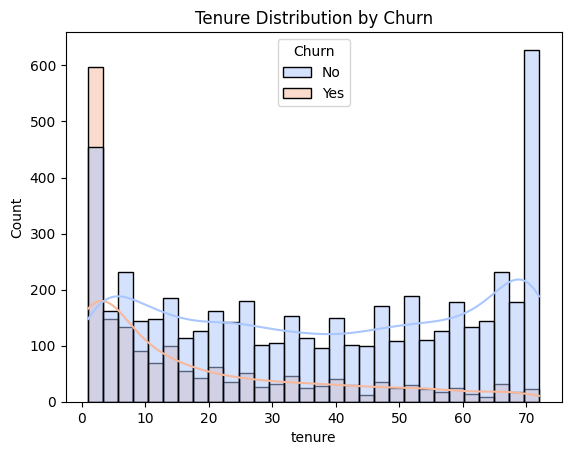

In [24]:
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True, palette='coolwarm')
plt.title('Tenure Distribution by Churn')
plt.show()


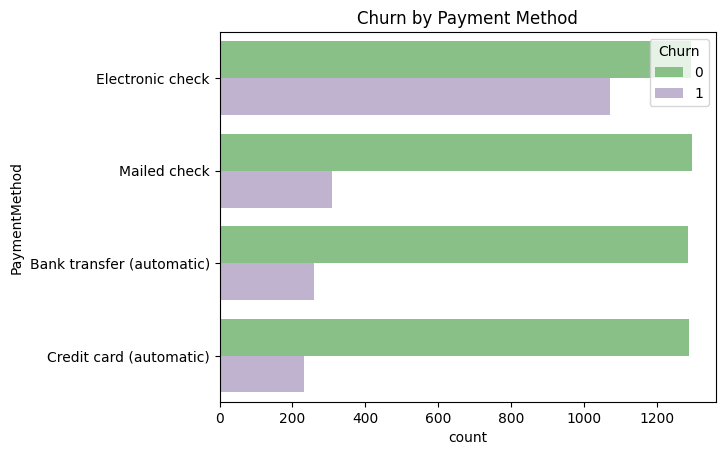

In [21]:
payment_cols = [col for col in df.columns if 'PaymentMethod_' in col]
df_pay = df.copy()
df_pay['PaymentMethod'] = df_pay[payment_cols].idxmax(axis=1).str.replace('PaymentMethod_', '')

sns.countplot(data=df_pay, y='PaymentMethod', hue='Churn', palette='Accent')
plt.title('Churn by Payment Method')
plt.show()


In [26]:
import joblib

# Re-train model (if not already trained)
rf_model.fit(X_train_scaled, y_train)

# Save model, feature names, and scaler in a single .pkl file
with open("churn_model.pkl", "wb") as f:
    joblib.dump((rf_model, X.columns.tolist(), scaler), f)

print("✅ Model saved as 'churn_model.pkl' with columns and scaler.")


✅ Model saved as 'churn_model.pkl' with columns and scaler.
